In [3]:
import glob, cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [24]:
# Get points
obj_points = np.load('../data/calib_results/proj_obj_pts.npy')
cam_points = np.load('../data/calib_results/cam_circle_pts.npy')
proj_points = np.load('../data/calib_results/proj_circle_pts.npy')

In [22]:
def plot_for_image(points, im_id):
    x = points[im_id, :, :, 0]
    y = points[im_id, :, :, 1]

    fig, ax = plt.subplots()
    ax.plot(x, y, ls="", marker="o")
    for i, xi in enumerate(x):
        yi = y[i]
        ax.annotate(str(i), xy=(xi, yi))

    ax.invert_yaxis()
    plt.show()

In [36]:
len(obj_points)

12

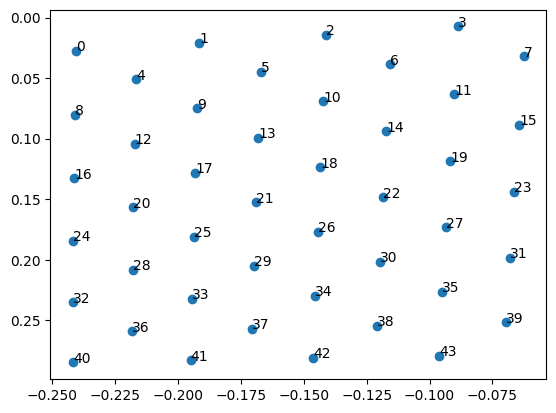

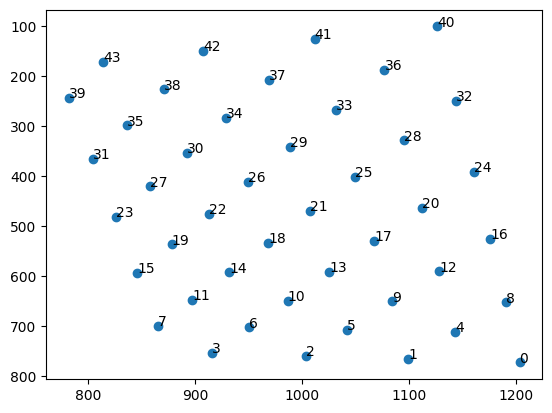

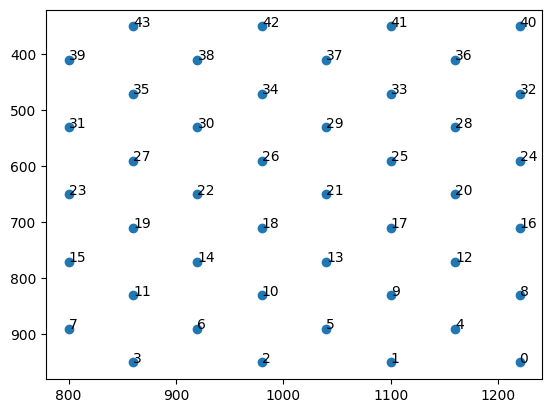

In [37]:
im_id = 11
plot_for_image(obj_points, im_id)
plot_for_image(cam_points, im_id)
plot_for_image(proj_points, im_id)

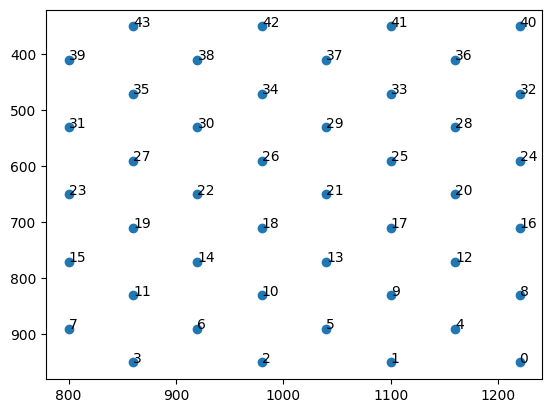

In [23]:
def build_circle_grid_pts(nb_col, nb_row, circle_r):
    circle_2d_pts = np.zeros((nb_col*nb_row, 2), dtype=np.int32)
    count = 0
    for i in range(nb_row-1, -1, -1):
        for j in range(nb_col-1, -1, -1):
            if i % 2 == 0:
                pos_x = j * 6 * circle_r + (3 * circle_r)
            else:
                pos_x = j * 6 * circle_r 
            pos_y = i * 3 * circle_r
            circle_2d_pts[count] = [pos_x, pos_y]
            count += 1
    return circle_2d_pts

test_circle_pts = build_circle_grid_pts(4, 11, 20)
test_circle_pts += [800, 350]
x = test_circle_pts[:, 0]
y = test_circle_pts[:, 1]

fig, ax = plt.subplots()
ax.plot(x, y, ls="", marker="o")
for i, xi in enumerate(x):
    yi = y[i]
    ax.annotate(str(i), xy=(xi, yi))

ax.invert_yaxis()
plt.show()